In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# Initialization

Useful links:
1) https://ai.stackexchange.com/questions/37968/back-propagation-activation-function-derivative
2) https://www.cs.swarthmore.edu/~meeden/cs81/f15/BackPropDeriv.pdf

In [2]:
#activiation function for layer1
def tanh(x):
    return np.tanh(x)
#derivative of activation function for backprop
def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

Useful links:
1) https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

In [3]:
# Generates line distributed between -1 and 1 for tanh later, setting shape to rows,columns
#I = np.random.uniform(-1, 1, (num_input_nodes, num_training_pairs))
#Y = np.random.uniform(-1, 1, (num_output_nodes, num_training_pairs))
I = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
]).T

Y = np.array([
    [0],
    [1],
    [1],
    [0],
    [1],
    [0],
    [0],
    [1]
]).T

Useful links:
1) https://xnought.github.io/backprop-explainer/
2) https://medium.com/@eugenesh4work/from-inputs-to-outputs-understanding-the-inner-workings-of-a-neural-network-8a5fc25c7388
3) https://datascience.stackexchange.com/questions/44703/how-does-gradient-descent-and-backpropagation-work-together

+ input node - Each node corresponds to one feature/dimension of the input data. For example, if you're working with a dataset that has three features (temp, humidity, wind speed) then you'd set this to 3.
+ hidden node - Helps transform input data into a useful representation for hte output layer. (weights and activation functions)
+ output node - Each node corresponds to one dimension of the output data. For example, if you're trying to predict two different values from each input (temp and humidity the next day) then you'd set this to 2.
+ training pair - This is set based on the dataset size. Each column of the input matrix I and output matrix Y is one training example.

In [4]:
num_input_nodes = 3
num_hidden_nodes = 4
num_output_nodes = 1
#num_training_pairs = 5
num_training_pairs = I.shape[1]

Useful links:
1) https://datascience.stackexchange.com/questions/67440/how-to-understand-the-weights-and-biases-for-beginners
2) https://www.kaggle.com/code/ayuraj/experiment-tracking-with-weights-and-biases

In [5]:
# Each row corresponds to a hidden node and each column corresponds to an input node
W1 = np.random.uniform(-1, 1, (num_hidden_nodes, num_input_nodes))
W2 = np.random.uniform(-1, 1, (num_output_nodes, num_hidden_nodes))
# Each bias vector is added to the input of each output node
b1 = np.random.uniform(-1, 1, (num_hidden_nodes, 1))
b2 = np.random.uniform(-1, 1, (num_output_nodes, 1))

print("Initial Weights and Bias:")
print("W1:", W1)
print("W2:", W2)
print("b1:", b1)
print("b2:", b2)

Initial Weights and Bias:
W1: [[-0.37682592  0.268599    0.81445552]
 [ 0.34954765 -0.33146604  0.38129283]
 [-0.19069642 -0.24627626  0.36752969]
 [ 0.51331162 -0.01407747 -0.56434208]]
W2: [[ 0.76560165  0.41004492 -0.56883836  0.78722281]]
b1: [[-0.58957004]
 [ 0.77174751]
 [ 0.77891502]
 [ 0.98025454]]
b2: [[-0.50790574]]


Useful links:
1) https://www.jeremyjordan.me/nn-learning-rate/
2) https://medium.com/@theom/a-very-short-visual-introduction-to-learning-rate-schedulers-with-code-189eddffdb00

In [6]:
# Controls how much the weights and biases are adjusted during training while moving toward a min of the loss function
initial_learning_rate = 0.112
learning_rate = initial_learning_rate
# Factor to increase learning rate
stepSizeRate = 1.005
# Factor to decrease learning rate
stepBack = 0.99
# How many times it runs (also called "iterations")
num_epochs = 15000

# List to store training error and nrms for each epoch
training_errors = []
nrms_values = []
max_errors = []
learning_rates = []
# Initialize the previous error
E_prev = float('inf')

# Loop for training cycles

Useful links:
1) https://www.geeksforgeeks.org/numpy-tanh-python/
2) https://numpy.org/doc/stable/reference/generated/numpy.tanh.html
3) https://numpy.org/doc/stable/reference/generated/numpy.dot.html
4) https://www.statlect.com/matrix-algebra/linear-combinations (see a1, a2 for this)
5) https://www.geeksforgeeks.org/activation-functions-neural-networks/ (see y1, y2 for this)

### Layer 1:
$
( a_i^2 = \sum_{k=1}^{N} w_{i,k}^2 y_k^1 + b_i^2 )
$

### Layer 2:
$
( a_i^2 = \sum_{k=1}^{N} w_{i,k}^2 y_k^1 + b_i^2 )
$

### Activation:
$
( y_i^2 = f^2(a_i^2) )
$

- $( f^2 )$ can be linear or $( tanh )$:

&emsp;&emsp;&emsp;$
( y_i^2 = tanh(a_i^2) )
$

### Error Calculation
$( e_p = y_{d,p} - y_p^2 )$

The error e_p for each pair is calculated as the difference between the desired output $Y$ and the actual output $y2$

### Delta Calculation
The Output Layer Delta $(\delta^2)$ is calculated using the error and derivative of the $tanh$ activation function. The Hidden Layer Delta $(\delta^1)$ is calculated using the derivative of the $tanh$ activation function and the delta from the output layer.
For output layer:
- Linear activation:
&emsp;$(\delta^2 = e_p)$
- $tanh$ activation:
&emsp;$(\delta^2 = e_p \circ (1 - (y^2)^2))$
- Hidden layer delta ($\delta^1)$:
&emsp;$(\delta^1 = (1 - (y^1)^2) \circ (W2^T \delta^2))$

In [7]:
for epoch in range(num_epochs):
    # Initialize accumulator variables for the partials if it's the first training pattern
    pEpW1 = np.zeros_like(W1)
    pEpW2 = np.zeros_like(W2)
    pEpB1 = np.zeros_like(b1)
    pEpB2 = np.zeros_like(b2)

    for p in range(num_training_pairs):
        # Extract the p-th input and output pair
        I_p = I[:, p].reshape(-1, 1)
        Y_p = Y[:, p].reshape(-1, 1)

        # Forward pass for layer 1
        a1 = np.dot(W1, I_p) + b1
        y1 = tanh(a1)
        # Forward pass for layer 2
        a2 = np.dot(W2, y1) + b2
        y2 = tanh(a2)

        # Calculate the errors
        errors = Y_p - y2

        # Calculate deltas for the output layer
        delta2 = errors * tanh_derivative(a2)

        # Calculate deltas for the hidden layer
        delta1 = tanh_derivative(a1) * np.dot(W2.T, delta2)

        # Accumulate the partial derivatives
        pEpW1 -= np.dot(delta1, I_p.T)
        pEpB1 -= delta1
        pEpW2 -= np.dot(delta2, y1.T)
        pEpB2 -= delta2

    # squared error for this epoch
    total_error = np.sum(np.square(Y - tanh(np.dot(W2, tanh(np.dot(W1, I) + b1)) + b2)))
    training_errors.append(total_error)

    # Adjust the learning rate based on the change in error
    if total_error < E_prev:
        learning_rate *= stepSizeRate
    else:
        learning_rate *= stepBack

    # Record the current learning rate
    learning_rates.append(learning_rate)
    
    E_prev = total_error

    # Calculate NRMS for this epoch
    sum_squared_errors = np.sum(np.square(Y - tanh(np.dot(W2, tanh(np.dot(W1, I) + b1)) + b2)))
    sum_squared_desired_outputs = np.sum(np.square(Y))
    nrms = np.sqrt(sum_squared_errors / sum_squared_desired_outputs)
    nrms_values.append(nrms)

    # Calculate Max Error for this epoch
    max_error = np.max(np.abs(Y - tanh(np.dot(W2, tanh(np.dot(W1, I) + b1)) + b2)))
    max_errors.append(max_error)

    # weight updates
    W1 -= learning_rate * pEpW1 / num_training_pairs
    b1 -= learning_rate * pEpB1 / num_training_pairs
    W2 -= learning_rate * pEpW2 / num_training_pairs
    b2 -= learning_rate * pEpB2 / num_training_pairs

# Calculate final predictions
final_predictions = tanh(np.dot(W2, tanh(np.dot(W1, I) + b1)) + b2)

# Calculate Max Error
max_error = np.max(np.abs(Y - final_predictions))

# Calculate NRMS
sum_squared_errors = np.sum(np.square(Y - final_predictions))
sum_squared_desired_outputs = np.sum(np.square(Y))
nrms = np.sqrt(sum_squared_errors / sum_squared_desired_outputs)

# Calculate Max Error
max_error = np.max(np.abs(Y - final_predictions))

In [8]:
print("Input Matrix (I):", I)
print("\nLayer 1 Activations (a1):", a1)
print("\nLayer 1 Outputs (y1):", y1)
print("\nLayer 2 Activations (a2):", a2)
print("\nLayer 2 Outputs (y2):", y2)
print("\nErrors (e_p):", errors)
print("\nDelta for Output Layer (delta2):", delta2)
print("\nDelta for Hidden Layer (delta1):", delta1)
print("\nAccumulator Variables Initialized to Zero:")
print("pEpW1:", pEpW1)
print("pEpW2:", pEpW2)
print("pEpB1:", pEpB1)
print("pEpB2:", pEpB2)
print("------------------------------------------")
print("Updated Weights and Biases after Training:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)

Input Matrix (I): [[0 0 0 0 1 1 1 1]
 [0 0 1 1 0 0 1 1]
 [0 1 0 1 0 1 0 1]]

Layer 1 Activations (a1): [[ 0.96006007]
 [-0.03914944]
 [ 0.31390548]
 [ 0.4357127 ]]

Layer 1 Outputs (y1): [[ 0.74430366]
 [-0.03912945]
 [ 0.30398588]
 [ 0.41008441]]

Layer 2 Activations (a2): [[3.02074136]]

Layer 2 Outputs (y2): [[0.99525522]]

Errors (e_p): [[0.00474478]]

Delta for Output Layer (delta2): [[4.49190082e-05]]

Delta for Hidden Layer (delta1): [[ 6.14760218e-05]
 [ 9.32042648e-05]
 [-7.42377957e-05]
 [ 8.25180397e-05]]

Accumulator Variables Initialized to Zero:
pEpW1: [[-0.00079868 -0.00039104 -0.00059435]
 [-0.00107741 -0.00167176 -0.00125089]
 [ 0.00174127  0.00079048  0.00163009]
 [-0.00162145 -0.00235191 -0.00360105]]
pEpW2: [[ 0.00085642 -0.00018397 -0.00084199 -0.00154423]]
pEpB1: [[-0.00143934]
 [-0.0031858 ]
 [ 0.00322797]
 [-0.00427663]]
pEpB2: [[-0.00330307]]
------------------------------------------
Updated Weights and Biases after Training:
W1: [[-2.75021943  2.47260294  2.4

NRMS: $(\sqrt{\frac{\sum_{p} \sum_{n} e_{n,p}^2}{\sum_{p} \sum_{n} (y_{d,n,p})^2}})$

Max Error: $(\text{Max Error} = \max(|e_{n,p}|))$

In [9]:
print(f"NRMS: {nrms_values[-1]}")
print(f"Max Error: {max_error}")

NRMS: 0.007377400442833542
Max Error: 0.011296394861616599


In [10]:
# Generate the logistic map for x
lambda_value = 4.0
x0 = 0.1
iterations = 300

# Initialize array to store the values
x_values = np.zeros(iterations)
x_values[0] = x0

# Generate the logistic map for x
for k in range(1, iterations):
    x_values[k] = lambda_value * x_values[k-1] * (1 - x_values[k-1])

# Prepare data for the logistic map plot
x_k = x_values[:-1]
x_k1 = x_values[1:]
#adjustment for plotting issue
sorted_indices = np.argsort(x_k)
x_k_sorted = x_k[sorted_indices]
x_k1_sorted = x_k1[sorted_indices]

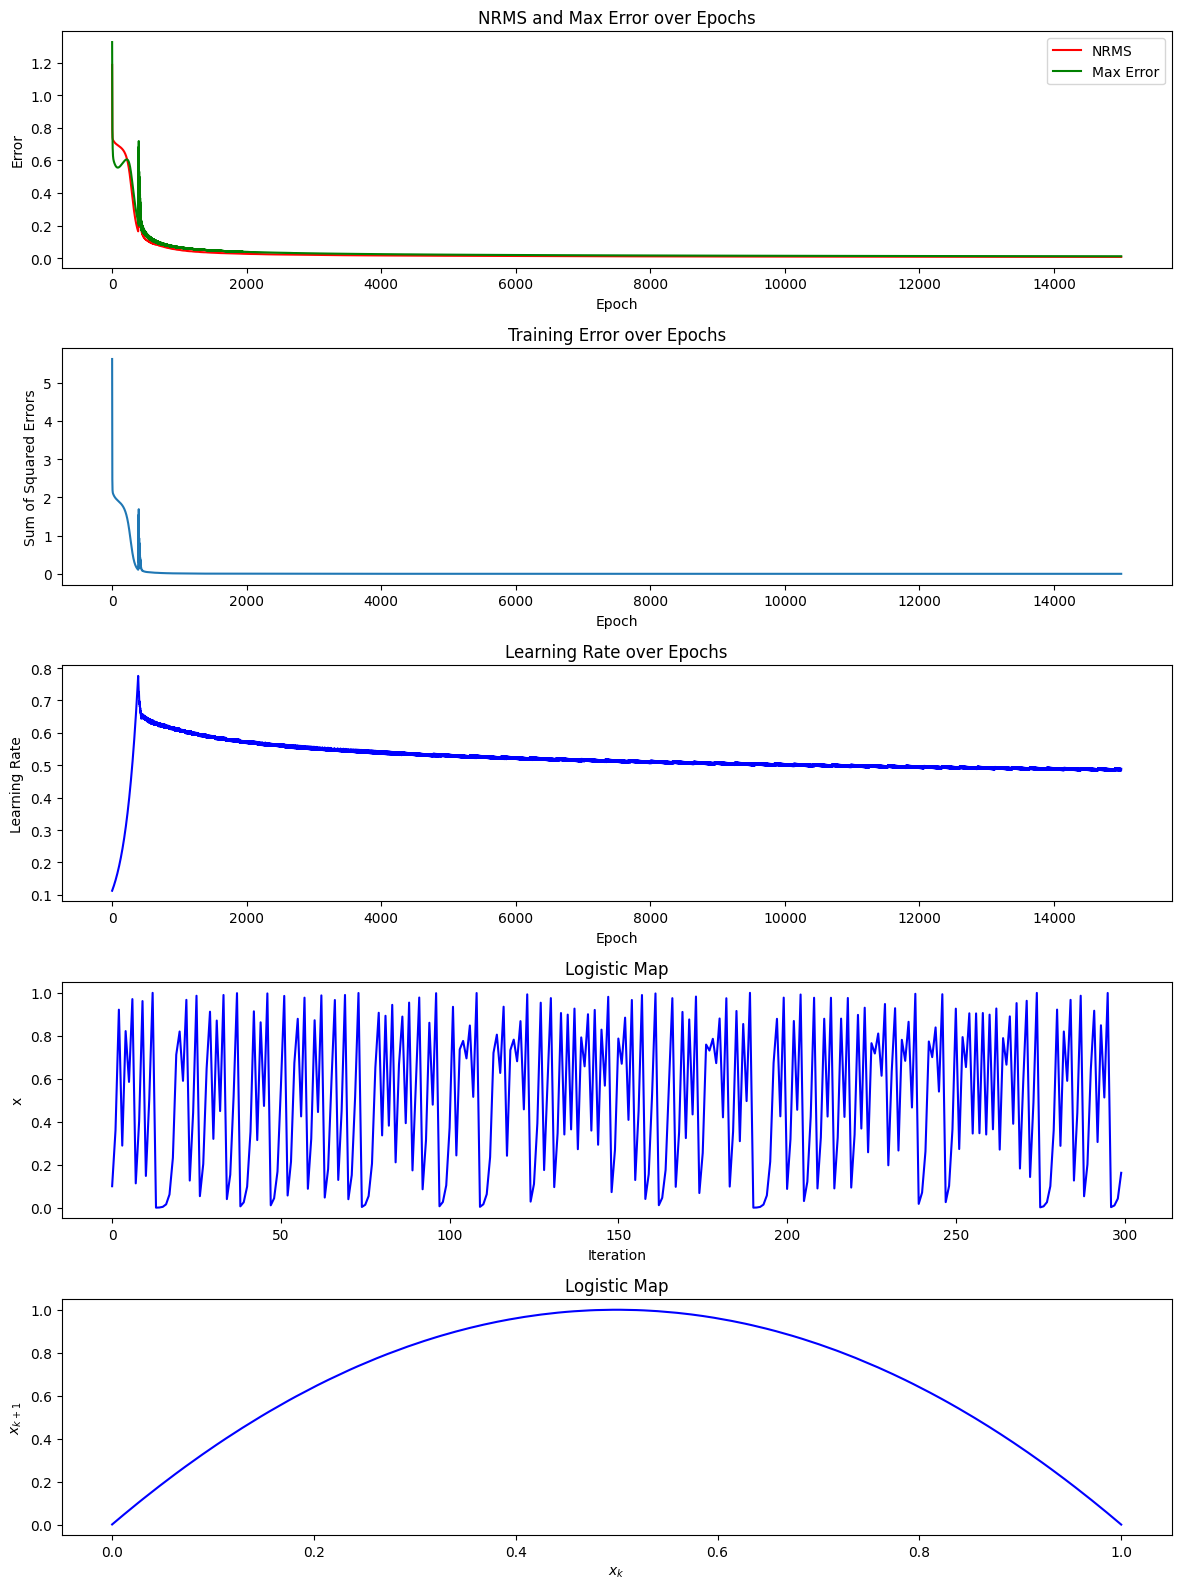

In [11]:
# Plotting
plt.figure(figsize=(12, 16))

# Plot the NRMS and Max Error over epochs
plt.subplot(5, 1, 1)
plt.plot(range(num_epochs), nrms_values, label='NRMS', color='r')
plt.plot(range(num_epochs), max_errors, label='Max Error', color='g')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('NRMS and Max Error over Epochs')
plt.legend()

# Training error over epochs
plt.subplot(5, 1, 2)
plt.plot(range(num_epochs), training_errors, label='Training Error')
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Errors')
plt.title('Training Error over Epochs')

# Plot the learning rate over epochs
plt.subplot(5, 1, 3)
plt.plot(range(num_epochs), learning_rates, label='Learning Rate', color='b')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate over Epochs')

# Plot the logistic map for x
plt.subplot(5, 1, 4)
plt.plot(range(len(x_values)), x_values, label='Logistic Map1', color='blue')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Logistic Map')

# Plot the logistic map x_k+1 vs x_k
plt.subplot(5, 1, 5)
plt.plot(x_k_sorted, x_k1_sorted, label='Logistic Map2', color='blue')
plt.xlabel('$x_k$')
plt.ylabel('$x_{k+1}$')
plt.title('Logistic Map')

plt.tight_layout()
plt.show()